In [1]:
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv('train_data.csv')

# Print the shape and head of the DataFrame
print("Shape of the DataFrame:", df.shape)
print("Head of the DataFrame:")
print(df.head())


Shape of the DataFrame: (25000, 2)
Head of the DataFrame:
                                              Review  Label
0  This film is absolutely awful, but nevertheles...      0
1  Well since seeing part's 1 through 3 I can hon...      0
2  I got to see this film at a preview and was da...      1
3  This adaptation positively butchers a classic ...      0
4  Råzone is an awful movie! It is so simple. It ...      0


In [2]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download the NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


# Define a function to preprocess the text data
def preprocess_text(text):
    # Remove HTML tags
    text = re.sub('<[^>]*>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]
    
    # Join the words back into a string
    text = " ".join(words)
    
    return text

# Apply the preprocessing function to the "Review" column
df['Review'] = df['Review'].apply(preprocess_text)

# Print the head of the DataFrame to verify the preprocessing
print(df.head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\viven\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viven\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\viven\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\viven\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


                                              Review  Label
0  film absolutely awful nevertheless hilarious t...      0
1  well since seeing part 1 3 honestly say never ...      0
2  got see film preview dazzled typical romantic ...      1
3  adaptation positively butcher classic beloved ...      0
4  råzone awful movie simple seems tried make mov...      0


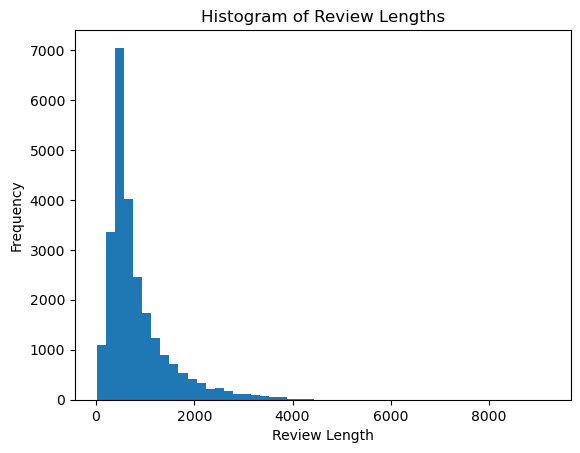

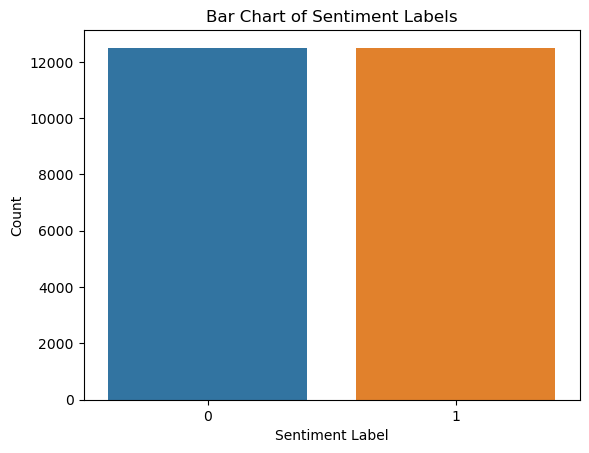

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the length of each review
df['ReviewLength'] = df['Review'].apply(len)

# Plot a histogram of review lengths
plt.hist(df['ReviewLength'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.title('Histogram of Review Lengths')
plt.show()

# Plot a bar chart of sentiment labels
sns.countplot(x='Label', data=df)
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Labels')
plt.show()



Naive Bayes performance on training data:
Naive Bayes accuracy: 0.9261
Naive Bayes confusion matrix:
 [[9296  675]
 [ 803 9226]]
Naive Bayes f1-score: 0.9260983446197217
Naive Bayes recall: 0.9261
Logistic Regression performance on training data:
Logistic Regression accuracy: 0.9379
Logistic Regression confusion matrix:
 [[9280  691]
 [ 551 9478]]
Logistic Regression f1-score: 0.9378956960481697
Logistic Regression recall: 0.9379

Naive Bayes performance on test data:
Accuracy: 0.8666
Confusion matrix:
 [[2189  340]
 [ 327 2144]]
F1-score: 0.8666031218128668
Recall: 0.8666
Logistic Regression performance on test data:
Accuracy: 0.891
Confusion matrix:
 [[2198  331]
 [ 214 2257]]
F1-score: 0.8909698987286989
Recall: 0.891


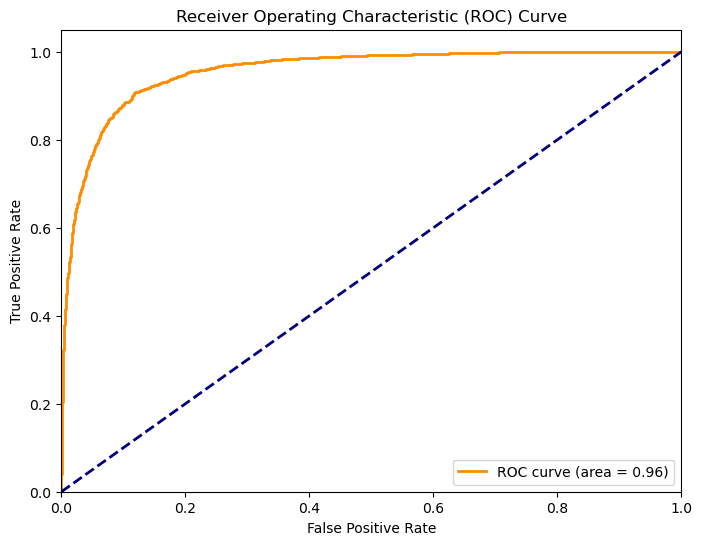

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Label'], test_size=0.2, random_state=42)
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Train the Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)

# Test the classifiers on the training set
nb_train_preds = nb_classifier.predict(X_train)
lr_train_preds = lr_classifier.predict(X_train)

# Calculate the accuracy of the classifiers on the training set
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)
lr_train_accuracy = accuracy_score(y_train, lr_train_preds)

# Calculate the confusion matrix, f1 score and recall score for the Naive Bayes classifier on the training set
nb_train_cm = confusion_matrix(y_train, nb_train_preds)
nb_train_f1_score = classification_report(y_train, nb_train_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['f1-score']
nb_train_recall = classification_report(y_train, nb_train_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['recall']

# Calculate the confusion matrix, f1 score and recall score for the Logistic Regression classifier on the training set
lr_train_cm = confusion_matrix(y_train, lr_train_preds)
lr_train_f1_score = classification_report(y_train, lr_train_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['f1-score']
lr_train_recall = classification_report(y_train, lr_train_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['recall']

# Test the classifiers on the test set
nb_test_preds = nb_classifier.predict(X_test)
lr_test_preds = lr_classifier.predict(X_test)

# Calculate the accuracy of the classifiers on the test set
nb_test_accuracy = accuracy_score(y_test, nb_test_preds)
lr_test_accuracy = accuracy_score(y_test, lr_test_preds)

# Calculate the confusion matrix, f1 score and recall score for the Naive Bayes classifier on the test set
nb_test_cm = confusion_matrix(y_test, nb_test_preds)
nb_test_f1_score = classification_report(y_test, nb_test_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['f1-score']
nb_test_recall = classification_report(y_test, nb_test_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['recall']

# Calculate the confusion matrix, f1 score and recall score for the Logistic Regression classifier on the test set
lr_test_cm = confusion_matrix(y_test, lr_test_preds)
lr_test_f1_score = classification_report(y_test, lr_test_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['f1-score']
lr_test_recall = classification_report(y_test, lr_test_preds, target_names=['Negative', 'Positive'], output_dict=True)['weighted avg']['recall']

# Print the performance metrics for the classifiers on the training set
print("Naive Bayes performance on training data:")
print("Naive Bayes accuracy:", nb_train_accuracy)
print("Naive Bayes confusion matrix:\n", nb_train_cm)
print("Naive Bayes f1-score:", nb_train_f1_score)
print("Naive Bayes recall:", nb_train_recall)
print("Logistic Regression performance on training data:")
print("Logistic Regression accuracy:", lr_train_accuracy)
print("Logistic Regression confusion matrix:\n", lr_train_cm)
print("Logistic Regression f1-score:", lr_train_f1_score)
print("Logistic Regression recall:", lr_train_recall)

# Print the performance metrics for the classifiers on the test data
print("\nNaive Bayes performance on test data:")
print("Accuracy:", nb_test_accuracy)
print("Confusion matrix:\n", nb_test_cm)
print("F1-score:", nb_test_f1_score)
print("Recall:", nb_test_recall)
print("Logistic Regression performance on test data:")
print("Accuracy:", lr_test_accuracy)
print("Confusion matrix:\n", lr_test_cm)
print("F1-score:", lr_test_f1_score)
print("Recall:", lr_test_recall)



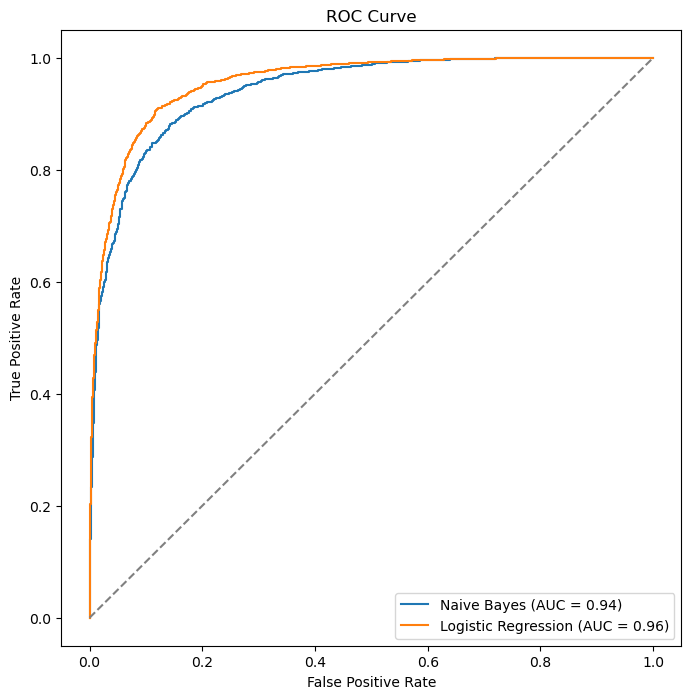

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the test set
nb_preds_proba = nb_classifier.predict_proba(X_test)[:,1]
lr_preds_proba = lr_classifier.predict_proba(X_test)[:,1]

# Calculate the ROC curve and AUC score for the Naive Bayes classifier
nb_fpr, nb_tpr, nb_thresholds = roc_curve(y_test, nb_preds_proba)
nb_auc = roc_auc_score(y_test, nb_preds_proba)

# Calculate the ROC curve and AUC score for the Logistic Regression classifier
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_preds_proba)
lr_auc = roc_auc_score(y_test, lr_preds_proba)

# Plot the ROC curves for both classifiers
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(nb_fpr, nb_tpr, label=f'Naive Bayes (AUC = {nb_auc:.2f})')
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
